# Clustering of Countries Assignment


In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#For Scaling
from sklearn.preprocessing import StandardScaler

#For KMeans clustering
from sklearn.cluster import KMeans

#For Hierarchial Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [2]:
# Reading the given csv file in dataframe df

df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking the dimensions of Data
df.shape

(167, 10)

Observation : 167 rows and 10 columns

In [4]:
# Basics of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


We observe that the colums are having all 167 values non-null. That means there are no missing values found in the dataset. All the datatypes are also appropriate. Country is object and all other columns are either int or float. All columns are numeric

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


A quick observation of the numerical columns analysis shows that other than life_expec, import and health, pretty much all columns have a significant difference between the mean and median (50% quantile values). That indicates the skewness in the data. We shall see it further in our univariate analysis.

In [6]:
# Since 3 columns are percentage value of gdpp
# Convert exports, imports and health columns to its absolute values
# Created a List of the three columns and ran the percentage formula on the same

L=['exports','imports','health']
for col in L:
    df[col]=df[col]*df['gdpp']/100

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


The percentage values are changed into absolute values as we can observe

In [7]:
# Storing all the columns name in a list for later use

column_list=list(df.columns)

In [8]:
column_list

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [9]:
#Removing the country column by slicing the original list as it will not be used for analysis

column_list=column_list[1:]
column_list

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

We removed the country from the column_list because it is like and identity columns and there is no need to do any EDA analysis on that column

## EDA

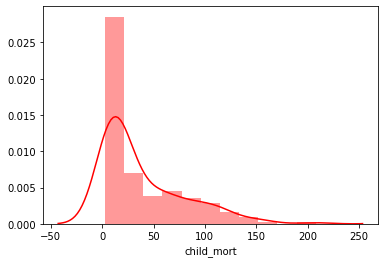

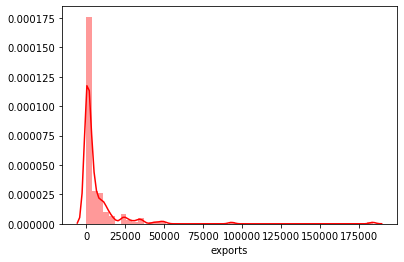

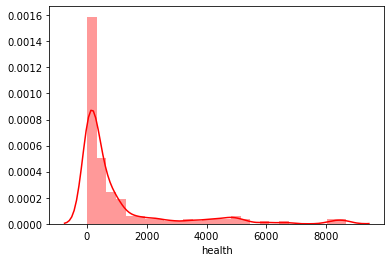

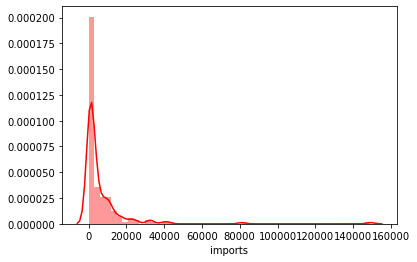

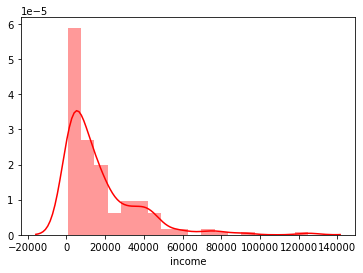

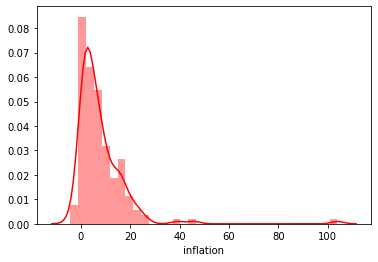

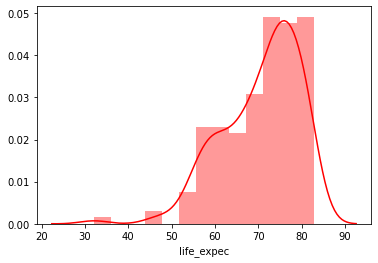

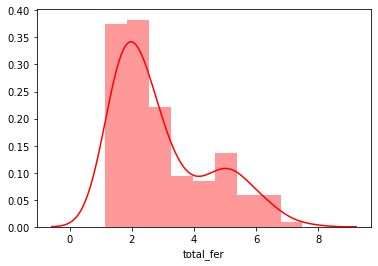

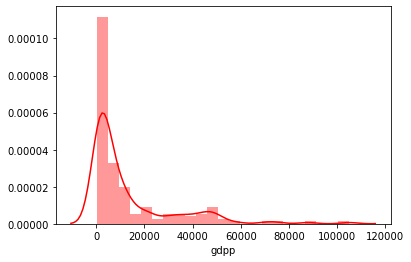

In [10]:
#Lets observe the distribution of data in each of the columns

for col in column_list:
    sns.distplot(df[col],color='red')
    plt.show();

As we can observe that most of the data is highly skewed which will make good clustering data. Other than life expectancy which is heavily skewed on the right hand side, most of the other columns are left skewed.

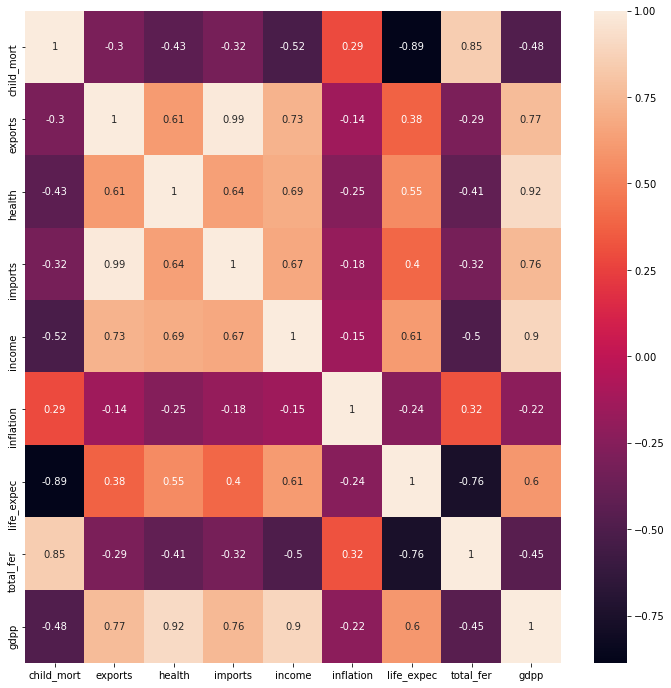

In [11]:
# Lets do some bi-variate analysis by studying the correlation between the columns using the heatmap

plt.figure(figsize=(12,12))
sns.heatmap(df[column_list].corr(),annot=True)
plt.show();

Here are the observations from the correlation matrix heatmap analysis
-There is a high positive correlation between total_fer and child_mortality which means that as the number of children increases to each woman, the child mortality also increases.
- Observe the strong negative correlation between life_expec and child_mort. Based on the data dictionary, they are columns that indicate similar things that is the average number of years a new born child would live if the current mortality patterns are to remain the same and the total deaths of childern under 5 years of age per 1000 live births.
- Another obvious observation is the connection of income and the GDPP of the country. Strong positive correlation there.
- We can also observe similarly a strong positive correlation in imports, exports and health with the gdpp.
- The other columns do not have any striking correlations observed among them.

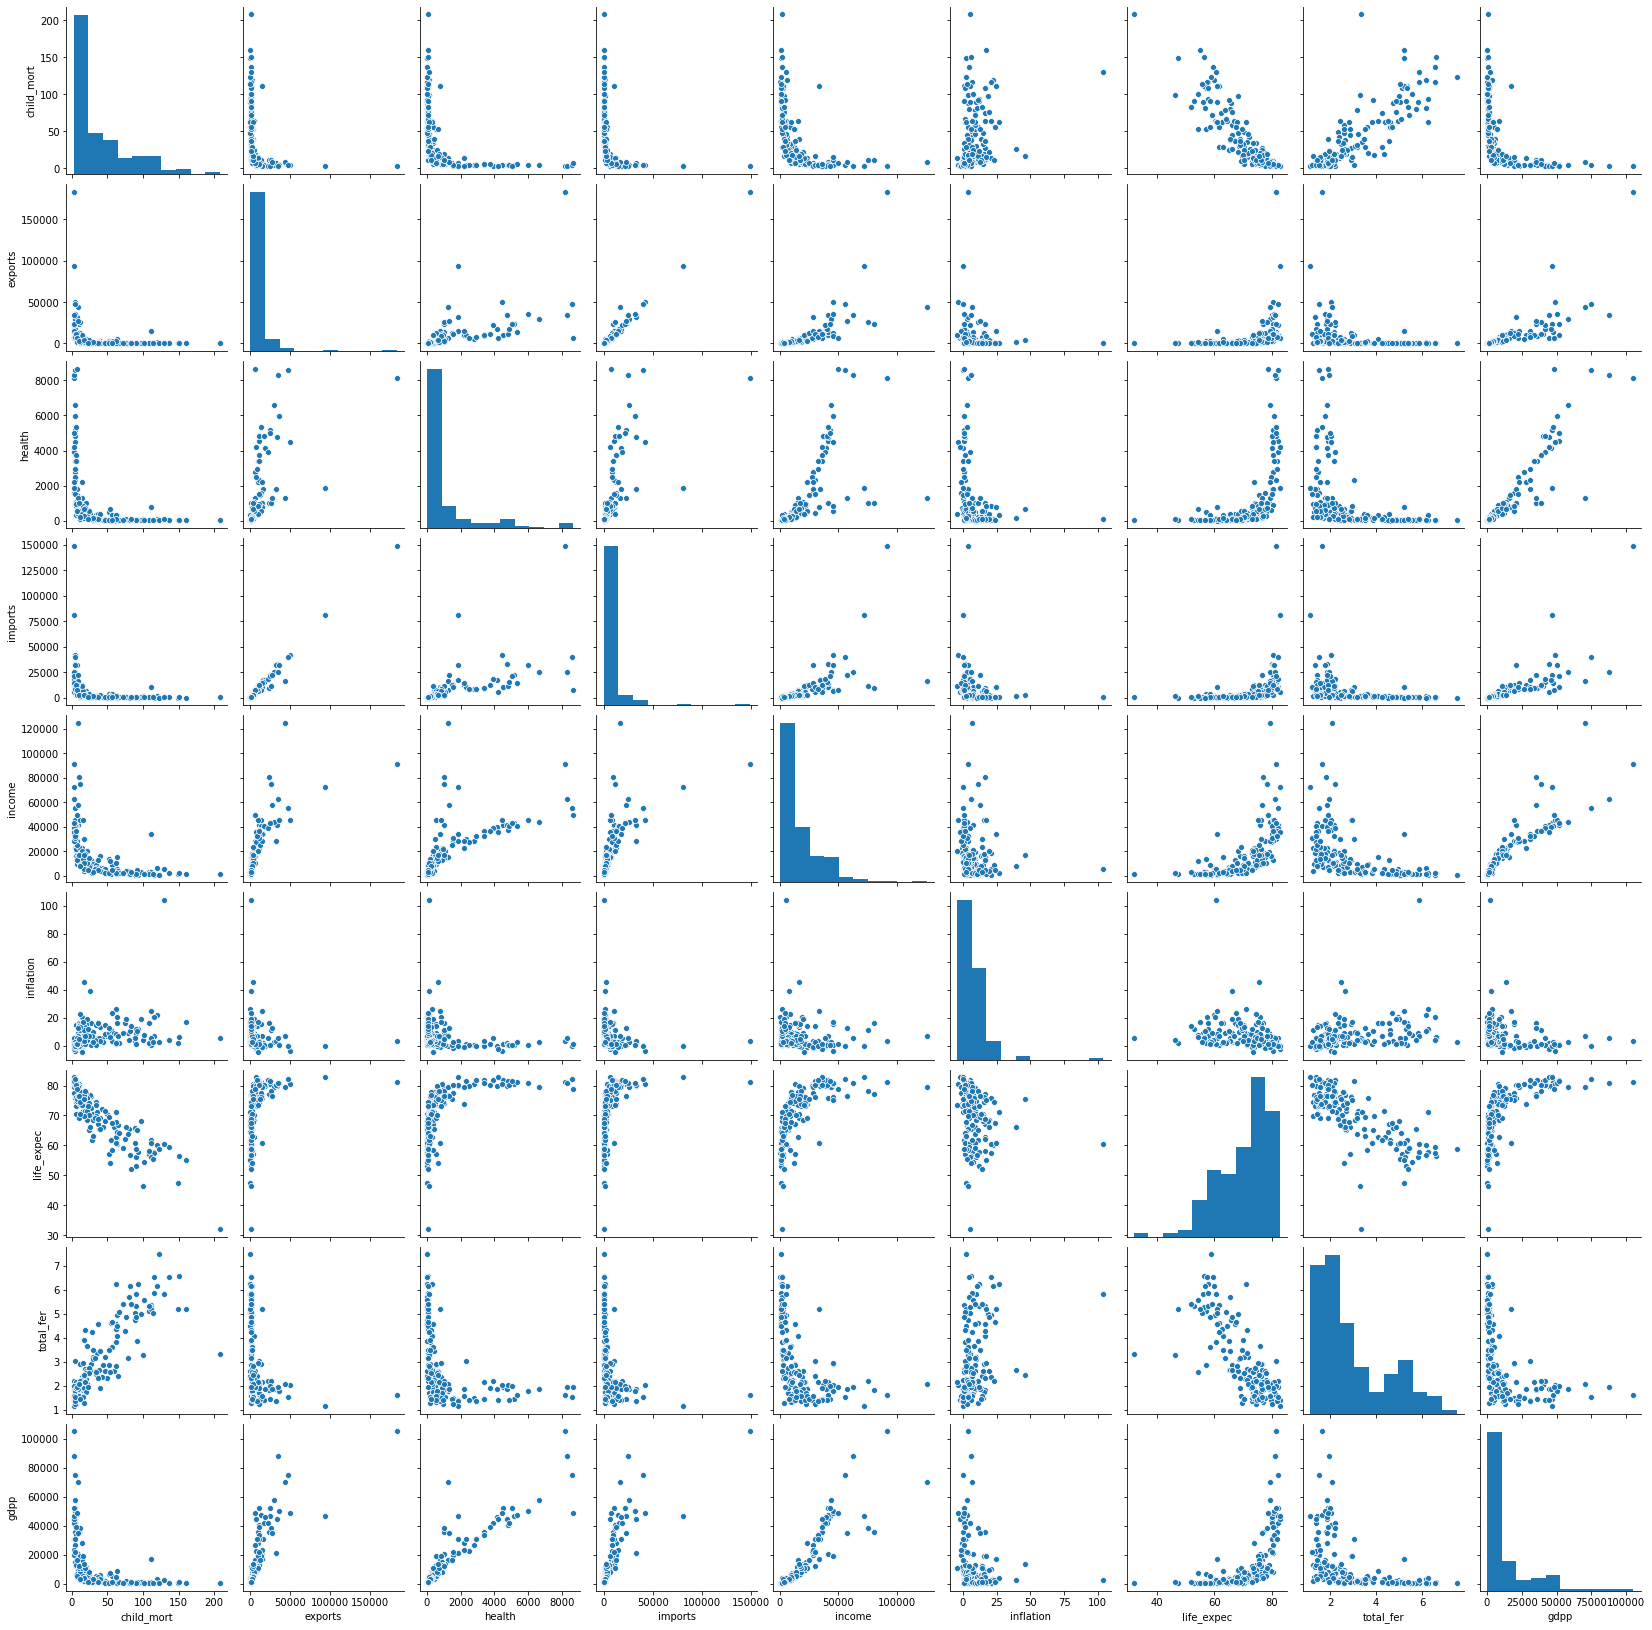

In [12]:
# Lets verify the observations above with the pairplot analysis

sns.pairplot(df[column_list])
plt.show();

The same observations as that from the heatmap can be verified in this pairplot matrix here

## Outlier Treatment

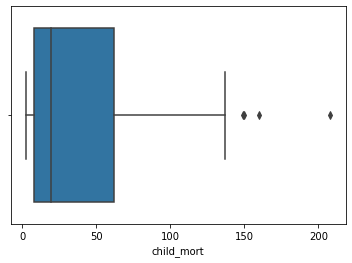

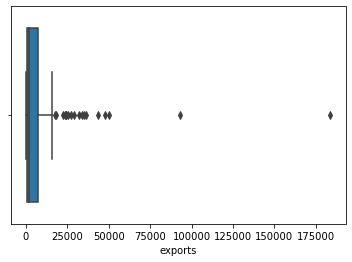

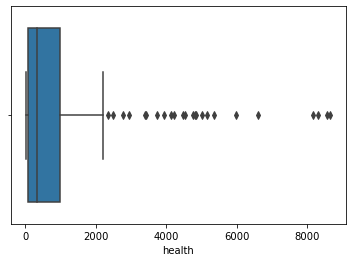

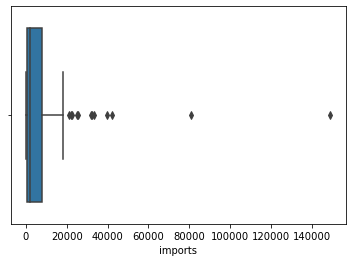

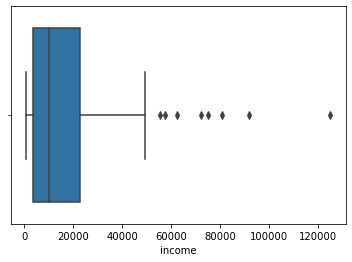

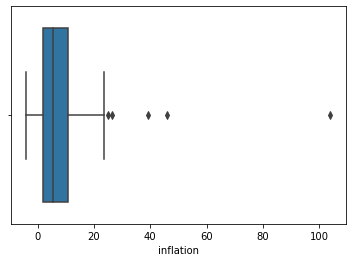

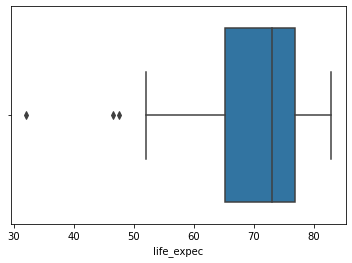

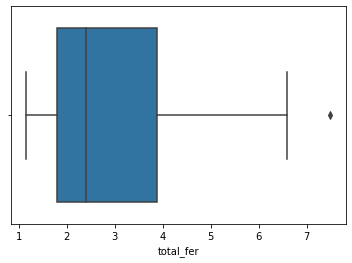

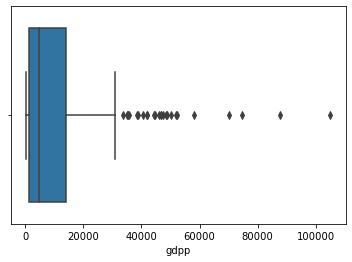

In [13]:
# Lets look at each columns value counts to observe the outliers

for col in column_list:
    sns.boxplot(df[col])
    plt.show()

As we can see from the boxplots above, child_mort, inflation and total_fer columns has an outlier or two towards right (higher values) but we will not be addressing those because they are essential to keep as is for our business problem to be solved.
On the other hand, all the other columns, i.e. 'exports','health','imports','income','life_expec','gdpp' has many outliers on the higher side, which we will address by soft capping for the analysis.

In [14]:
# Checking the upper and lower quantile values of the columns

for col in column_list:
    lowerquantile=df[col].quantile(0.01)
    upperquantile=df[col].quantile(0.99)
    print('*** Column Name : ',col,' ***')
    print('Lower quantile is : ',lowerquantile,'\nUpper quantile is : ',upperquantile)

*** Column Name :  child_mort  ***
Lower quantile is :  2.8 
Upper quantile is :  153.40000000000003
*** Column Name :  exports  ***
Lower quantile is :  22.243716000000003 
Upper quantile is :  64794.26000000014
*** Column Name :  health  ***
Lower quantile is :  17.009362 
Upper quantile is :  8410.3304
*** Column Name :  imports  ***
Lower quantile is :  104.90964000000001 
Upper quantile is :  55371.39000000013
*** Column Name :  income  ***
Lower quantile is :  742.24 
Upper quantile is :  84374.00000000003
*** Column Name :  inflation  ***
Lower quantile is :  -2.3487999999999998 
Upper quantile is :  41.47800000000002
*** Column Name :  life_expec  ***
Lower quantile is :  47.160000000000004 
Upper quantile is :  82.37
*** Column Name :  total_fer  ***
Lower quantile is :  1.2431999999999999 
Upper quantile is :  6.563599999999999
*** Column Name :  gdpp  ***
Lower quantile is :  331.62 
Upper quantile is :  79088.00000000004


In [15]:
# Checking how many values below the lower quantile for child_mort

df[df['child_mort']< 2.8]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
68,Iceland,2.6,22374.6,3938.6,18142.7,38800,5.47,82.0,2.2,41900


In [16]:
# Checking how many values below the lower quantile for inflation

df[df['inflation']< -2.3487999999999998]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.22,80.4,2.05,48700
131,Seychelles,14.4,10130.4,367.20,11664.0,20400,-4.21,73.4,2.17,10800


In [17]:
# Checking how many values below the lower quantile for total_fer

df[df['total_fer']< 1.2431999999999999]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
138,South Korea,4.1,10917.4,1531.53,10210.2,30400,3.160,80.1,1.23,22100


In [18]:
# For columns such as child_mort, inflation, total_fer we will not be addressing the upper range outliers by capping

for i in ['child_mort','inflation','total_fer']:
    lowerquantile=df[i].quantile(0.01)
    df[i][df[i]<=lowerquantile]=lowerquantile


# For columns exports, health, imports, income, life_expec, gdpp we will be addressing only upper range outliers by capping

for i in ['exports','health','imports','income','life_expec','gdpp']:
    upperquantile=df[i].quantile(0.99)
    df[i][df[i]>=upperquantile]=upperquantile

In [19]:
df[df['child_mort']< 2.8]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


Capping was successful

## Hopkins Test
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [20]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [21]:
# How different your data is from randomly scattered data
# Checking for  50 tests and taking an average.

counter=0
for i in range(50):
    temp=hopkins(df.drop('country', axis=1))
    counter=counter + temp
    print(temp,end=' | ')
print('\nThe average of the 50 hopkins test is : ',counter/50)

0.9028028927379816 | 0.9403442240323914 | 0.8961832285491642 | 0.9362839908566024 | 0.9544636837924508 | 0.8953148073660515 | 0.9567732464647815 | 0.9346155723863677 | 0.9314649821827259 | 0.876490942288414 | 0.919432945516113 | 0.8903360017903301 | 0.8266052773966837 | 0.93643073876002 | 0.8954259284795854 | 0.9732691978763451 | 0.9180655957555749 | 0.8997953862454922 | 0.949425221830228 | 0.9289102802848096 | 0.9349677494539576 | 0.919471715470428 | 0.82487050854686 | 0.9402793449554673 | 0.9524492506018355 | 0.8655688482515626 | 0.9658897201701349 | 0.8176958507269516 | 0.8653997456464969 | 0.9307973228751769 | 0.9423353574219832 | 0.8696459036763793 | 0.9159624198992683 | 0.8908106725513559 | 0.8974622919137292 | 0.9324132527870087 | 0.9593082803509697 | 0.9188817832183505 | 0.9773785854193977 | 0.9469812963068276 | 0.9116256749995909 | 0.9138530749066158 | 0.9616746455988278 | 0.8490406105892363 | 0.896878519424757 | 0.9270981627607636 | 0.9244702360115766 | 0.9339041950948231 | 0

Hopkin's test says that our data is more than 90% different from the randomly scattered data.

The higher the value of dissimilarity, the more apt is our data for clustering. So we can say that the given dataset has a high tendency to cluster

## Data Preparation before modelling
We will apply standard scaler to the columns other than country to prepare the data before applying the clustering algorithms

In [22]:
# Lets create a new dataframe df1 which will be our scaled data

ss = StandardScaler()
df1 = ss.fit_transform(df.drop("country",axis=1))



In [23]:
# Check the scaled data

df1=pd.DataFrame(df1)
df1.columns=column_list
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.705262,-0.542634,-0.032042


We observe that the data scaling was successful and the values in df1 are changed accordingly

## Finding K value - optimal number of Clusters
### Sillhouette Score method
$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [24]:
# Import the necessary library from sklearn.metrics module

from sklearn.metrics import silhouette_score

# Initialize the list for storing Silloutte score and number of cluster
ss = []

# Find the Silloutte score for values 2 to 10 
for k in range(2,11):
    kmean = KMeans(n_clusters=k, max_iter=50)
    kmean.fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
    
ss


[[2, 0.47855777352323214],
 [3, 0.422648203001893],
 [4, 0.40879580376006147],
 [5, 0.41515907769192784],
 [6, 0.3073591182842947],
 [7, 0.3235564440535474],
 [8, 0.2640693712864666],
 [9, 0.312825735805837],
 [10, 0.2955199874284537]]

In [25]:
# Create a dataframe of the gathered data points to plot

silhouette=pd.DataFrame(ss)
silhouette

,0,1
0,2,0.478558
1,3,0.422648
2,4,0.408796
3,5,0.415159
4,6,0.307359
5,7,0.323556
6,8,0.264069
7,9,0.312826
8,10,0.295520


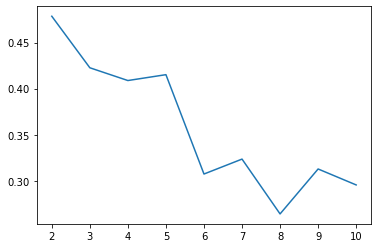

In [26]:
# Plot the K value vs Sillhouette score

plt.plot(silhouette[0],silhouette[1])
plt.show();

The Sillhouette score drops from k value of 2 to 3, but the drop is not significant from 3 to 4. We can say that given the dataset size, we could go for the k value of 3 for our clustering. But before our decision, lets check another method to find optimal values of cluster.

## SSD: Elbow method

In [27]:
# SSD: Elbow curve method
# When we apply the KMeans clustering method, we get a field called inertia_
# inertia_ indicates the sum of squared distances of samples to their closest cluster center.

ssd = []
# try applying the clustering for different values of k from 2 to 10 and see the inertia_ value
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ssd.append([k, kmean.inertia_])
ssd

[[2, 851.9248067598297],
 [3, 561.7054192839777],
 [4, 450.04434853738223],
 [5, 370.39149160578626],
 [6, 326.8316245578082],
 [7, 296.02587893447486],
 [8, 266.37731721066865],
 [9, 239.37174123482865],
 [10, 222.5045938374977]]

In [28]:
# create a dataframe from the acquired values of kmean.inertia_
ssd = pd.DataFrame(ssd)
ssd


,0,1
0,2,851.924807
1,3,561.705419
2,4,450.044349
3,5,370.391492
4,6,326.831625
5,7,296.025879
6,8,266.377317
7,9,239.371741
8,10,222.504594


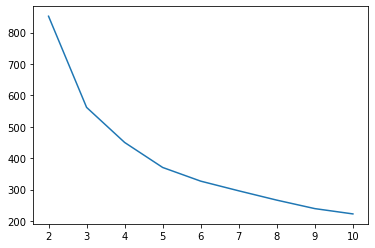

In [29]:
plt.plot(ssd[0],ssd[1]);

As we can see that from k value of 2 to 3, we have a significant drop in the SSD value, but after that the slope is not that steep. Also, the total number of rows in our dataset is not very large. So it does not make sense to create more clusters out of already small number of data points. 

Hence, considering the outcome of both Silhouetted score and the SSD method curve and also the size of the given dataset, we have decided to go with the number of cluster as 3

In [30]:
# Chosen number of cluster is 3

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [31]:
# Co-ordinates of the cluster center or the centroids
kmeans.cluster_centers_

array([[ 1.32661556, -0.49724204, -0.52612588, -0.53713716, -0.72390519,
         0.39088869, -1.27665026,  1.35458158, -0.62421756],
       [-0.82501312,  1.74867521,  1.85335572,  1.7215187 ,  1.79855215,
        -0.44150315,  1.11549646, -0.77554478,  1.99793841],
       [-0.45002383, -0.25376753, -0.26941915, -0.22498284, -0.15014629,
        -0.07437035,  0.33870443, -0.47913268, -0.26067276]])

In [32]:
# Cluster labels

kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [33]:
# Apply the cluster labels observed from the Kmeans algorithm to the original dataframe
df['labels']=kmeans.labels_

In [34]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


The labels are successfully applied to the dataset

In [35]:
df['labels'].value_counts()


2    92
0    48
1    27
Name: labels, dtype: int64

As we can see 3 clusters are formed with the value count of 48, 27 and 92 countries in clusters 0, 1 and 2 respectively. Now lets see how the clustering algorithm has differentiated the 3 key parameters - the gdpp, child_mort and income. We will do that using the scatter plots. 

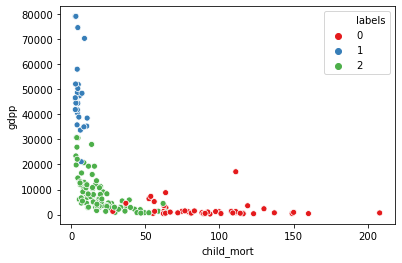

In [36]:
sns.scatterplot(x='child_mort', y='gdpp', hue='labels', data=df, palette='Set1')
plt.show();

Observation : Cluster 0 has high child mortality and low gdpp, cluster one has high gdpp and low child_mort. Whereas cluster 2 is low gdpp and low child_mort cluster

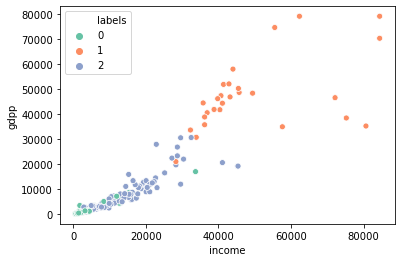

In [37]:
sns.scatterplot(x='income',y='gdpp', hue='labels', data=df, palette='Set2')
plt.show();

Observation : Cluster 0 has low income and low gdpp , cluster one has high gdpp and high income. Cluster 2 is medium gdpp and medium income cluster

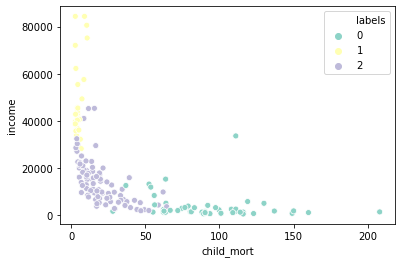

In [38]:
sns.scatterplot(x='child_mort',y='income', hue='labels', data=df, palette='Set3')
plt.show();

Observation : Cluster 0 has high child_mort and low income , cluster one has high income and low child_mort. Cluster 2 is low income and low child_mort cluster

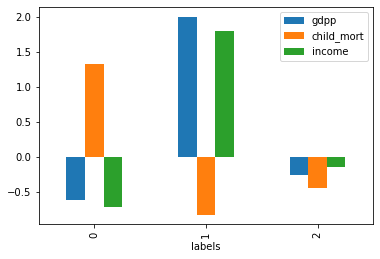

In [39]:
# Lets do another multivariate analysis based on labels
# Here I have opted for the scaled data to see the striking difference between the data points 
# To make the decision to choose the right cluster for aid

df1['labels']=df['labels']
df1[['gdpp','child_mort','income','labels']].groupby('labels').mean().plot(kind='bar')
plt.show();

From the above plot we observe the following pattern in clustering:
1. The cluster 0 has high child mortality and low gdpp and low income. 
2. The cluster 1 has high gdpp and high income and low child mortality
3. The cluster 2 has low gdpp and low income and low child mortality

Our business requirements suggest that the cluster 0 is the most appropriate cluster that is in the dire need of the aids based on its properties - i.e. high child mortality, low gdpp and low income cluster.

In [40]:
# Creating a new dataframe with just the selected cluster 0
c0=df[df['labels']==0]
c0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0


In [41]:
# Let's see how many countries we got in cluster 0

c0.shape

(48, 11)

In [42]:
# Lets find the top10 countries by sorting the c0 by gdpp, child_mort and income because they need help
# Here observe that we are doing the sorting on gdpp, child_mort and income in ascending, descending and ascending order respectively
# These list of countries will be given to our CEO as a result of our analysis
# Please note if we need more countries out of 48 countries in the cluster, the head value can be changed accordingly

top10countries = list(c0.sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True]).head(10).country)

In [43]:
top10countries

['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Sierra Leone',
 'Madagascar',
 'Mozambique',
 'Central African Republic',
 'Malawi',
 'Eritrea']

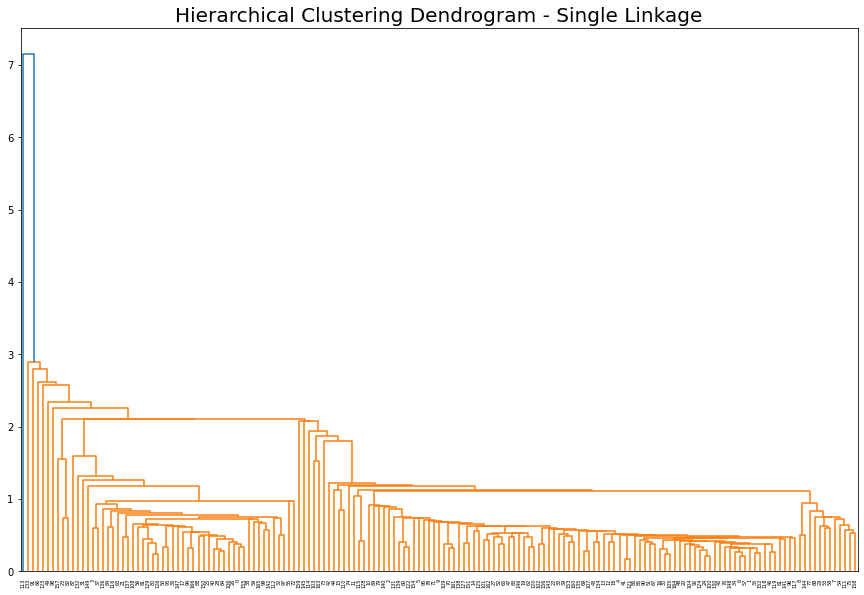

In [44]:
# Single Linkage method to do Hierarchical Clustering
# setting the figure and graph style
plt.figure(figsize=(15,10))

# setting the title
plt.title('Hierarchical Clustering Dendrogram - Single Linkage',fontsize=20)

# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)

plt.show();

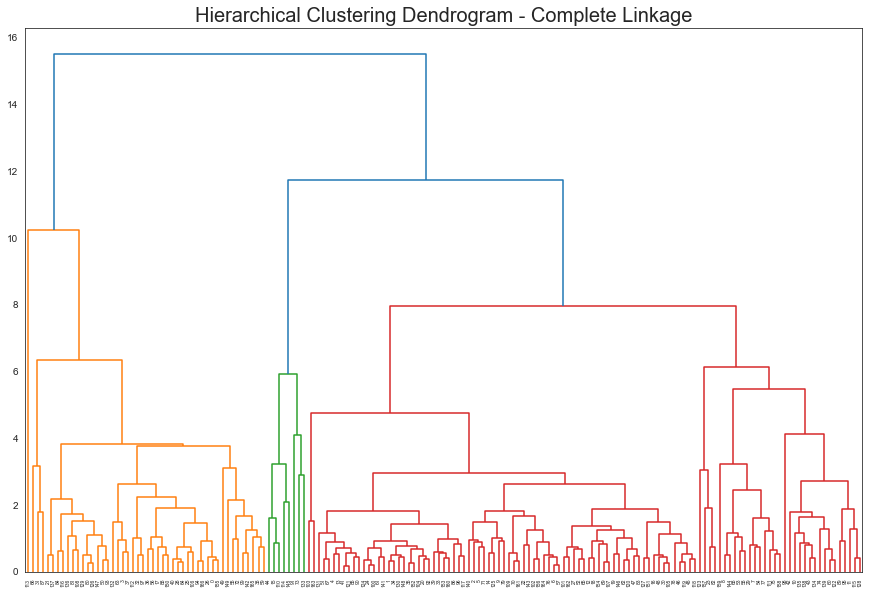

In [45]:
# Complete linkage method 

# setting the figure and graph style
plt.figure(figsize=(15,10))
sns.set_style('white')

# setting the title
plt.title('Hierarchical Clustering Dendrogram - Complete Linkage',fontsize=20)


# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

As we can observe the clustering is much well defined in the complete linkage method. We shall use the labels generated by complete linkage by using the cut_tree with 3 clusters.

In [46]:
# 3 clusters created as below
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [47]:
# assigning cluster labels created by hierarchical clustering to our original dataframe
df['cluster_labels']=cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,1


Observation : Here we can observe that the column 'labels' which is created by the K-means algorithm and the column 'cluster_labels', created by the hierarchical method are similar for our cluster of interest, i.e. cluster 0.

In [48]:
# Creating a datafrme where cluster_label=0
c2=df[df['cluster_labels']==0]
c2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0,0


In [49]:
c2.shape

(48, 12)

Observe that the same number of countries are clustered in the hierarchical method as the K means method. 48 countries.

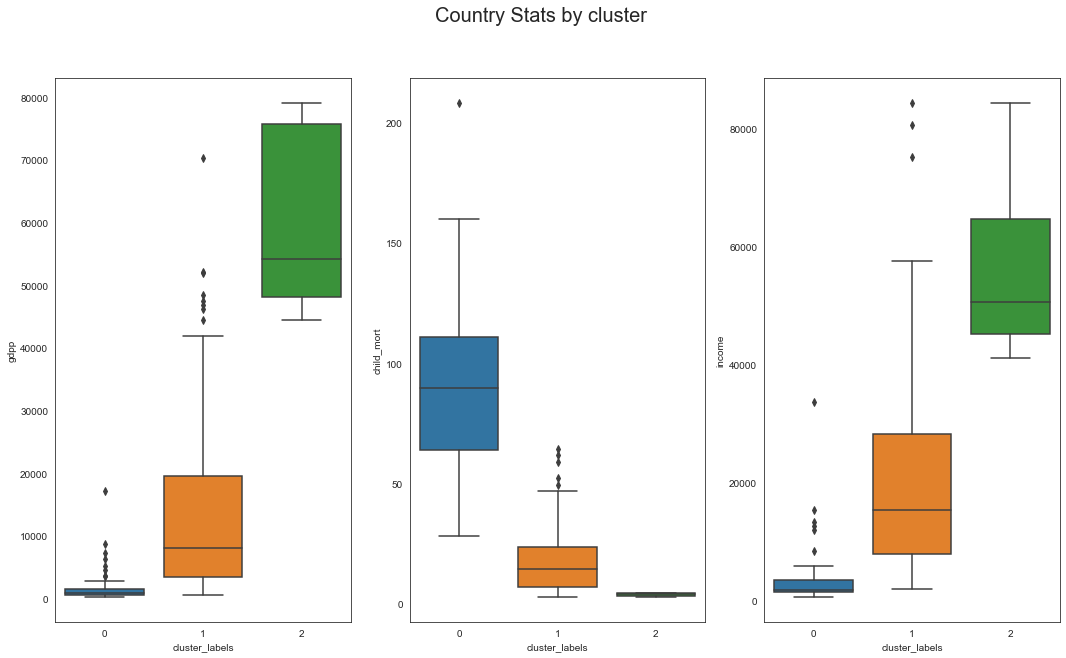

In [50]:
#Lets do one last subplot analysis to check the criteria of the clusters with respect to the gdpp, child_mort and income
# 1 X 3 plot
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# Set the tile of the subplot
fig.suptitle('Country Stats by cluster', fontsize=20)

sns.boxplot(ax=axes[0], data=df, x='cluster_labels', y='gdpp')
sns.boxplot(ax=axes[1], data=df, x='cluster_labels', y='child_mort')
sns.boxplot(ax=axes[2], data=df, x='cluster_labels', y='income')
plt.show();

We can observe that the cluster 0 here has low gdpp, high child_mort and low income, cluster 2 has high gdpp, low child_mort and high income and cluster 1 has comparatively medium gdpp, medium income and medium child_mort values

## The following list of countries will be presented to the CEO
1. Burundi
2. Liberia
3. Congo Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea
